# Import Libraries

In [1]:
import gc
import re

import string
import spacy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from datetime import datetime
from collections import Counter
from wordcloud import WordCloud


import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

import gensim

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

sns.set_palette("tab10")
#sns.set_palette("Paired")
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
encoding_number = 'ISO-8859-1'
columns_name = ['target', 'ids', 'date', 'flag', 'user', 'tweet']

path = '/content/drive/My Drive/Capstone Project/training.1600000.processed.noemoticon.csv'
df_0 = pd.read_csv(path, encoding = encoding_number, names = columns_name)

In [ ]:
df_0.head()

In [ ]:
df_0.dtypes

In [ ]:
df_0.shape

In [ ]:
df_0.tail()


In [ ]:
# date format is different

In [ ]:
df_0.target.unique()

In [ ]:
df_0.target.nunique()

In [ ]:
# as there is only two values of target, replace 4 with 1
df_0.target = df_0.target.replace(4,1)

In [ ]:
df_0.head()

In [ ]:
# 0 means negative sentiment, 1 means positive sentiment

In [ ]:
df_0['target'].value_counts(normalize = True)

In [ ]:
df_0

In [ ]:
df_0 = df_0.sort_values('target')
df_0.head(4)

In [17]:
df_0.tail(5)

,target,ids,date,flag,user,tweet
1066668,1,1965353425,Fri May 29 15:46:16 PDT 2009,NO_QUERY,lynnojebe,@stephaniepratt the short orange one!!! Soo pr...
1066669,1,1965353441,Fri May 29 15:46:16 PDT 2009,NO_QUERY,johnnnaa,@jaykpurdy hah varsity fanclub is on a board
1066670,1,1965353448,Fri May 29 15:46:18 PDT 2009,NO_QUERY,karinlinardy,@AndyTheSamurai been there before it's a cool...
1066648,1,1965337069,Fri May 29 15:44:32 PDT 2009,NO_QUERY,caitlinlavergne,Going to pick up Lakin. Leaving Brightside ton...
1599999,1,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


[Text(0, 0, 'Negative'), Text(0, 0, 'Positive')]

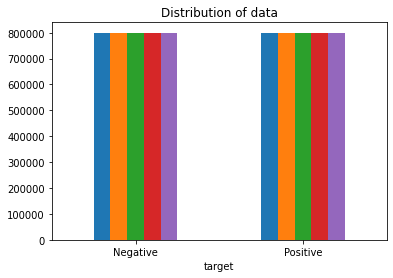

In [20]:
ax = df_0.groupby('target').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

In [21]:
df_1 = df_0[['target', 'tweet']]
df_1 = df_1.sort_values('target')
df_1.head()

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug


In [22]:
df_1.tail()

,target,tweet
1200000,1,danielle is the best thing since cheese in a c...
1599988,1,@Roy_Everitt ha- good job. that's right - we g...
1599976,1,"@mattycus Yeah, my conscience would be clear i..."
1599952,1,#Traveltuesday @GuyNGirlTravels Because their ...
1599999,1,happy #charitytuesday @theNSPCC @SparksCharity...


In [23]:
df_1.shape

(1600000, 2)

In [24]:
df_2= df_1.head(25000)
df_2

,target,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
5,0,@Kwesidei not the whole crew
6,0,Need a hug
...,...,...
24986,0,@Wahnbriefe It's really cold even though it's ...
24974,0,"so exhausted from a workout, might take a nap!..."
24950,0,My mouth feels incredibly awkward. God I want ...
16648,0,@tonylui oh sorry for the late response. she g...


In [129]:
df_3 = df_1.tail(25000)
df_3.head()

,target,tweet
1550000,1,@clg_cnd Get 100 followers a day using www.twe...
1575005,1,ok I hate the postman !
1575006,1,"Its our last night In Nashville, been packing..."
1575007,1,@iAmBWright .. Uh oh!! Don't end up on the shi...
1575008,1,@yaymekayla yah it's one of those nights ~_~ i...


In [130]:
df = pd.concat([df_2, df_3], axis = 0)

In [131]:
#df['target'].value_counts(normalize = True)
df['target'].value_counts()

0    25000
1    25000
Name: target, dtype: int64

In [132]:
df.shape

(50000, 2)

# Preprocess Text

In [133]:
def change_username(text):
        userPattern       = '@[^\s]+'            #  word behind @name 
        text = re.sub(userPattern, 'user', text)

        urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)" 
        text = re.sub(urlPattern, 'url', text)

        # reduce multiple spaces and newlines to only one
        text = re.sub(r'(\s\s+|\n\n+)', r'\1', text)
         # remove double quotes
        #text = re.sub(r'"', '', text)

        return text


In [134]:
df.sample(10)

,target,tweet
22829,0,@acaciaavenue Your so rags
18816,0,@noreenramli Oh babe!! Drove past Pink Sage to...
1595191,1,"Hm, 2GB/6hours = 0.33gb/hour, 0.33gb/60(min) =..."
6328,0,My throat feels like I swallowed a hot coal.
1580061,1,"Slept a little, woke up late, kitchen covered ..."
1594281,1,nothing at all!
1586561,1,Brb going to england
24734,0,"@sealegs_ yes, that's what I meant"
23658,0,@priorax *fingers crossed* I haven't actually ...
5557,0,"@josesosa Shit man, they closed your birthday ..."


In [135]:
pd.set_option('expand_frame_repr', False)
df['text'] = df['tweet'].apply(change_username)
df.head()

,target,tweet,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","user url - Awww, that's a bummer. You shoulda..."
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","user no, it's not behaving at all. i'm mad. wh..."
5,0,@Kwesidei not the whole crew,user not the whole crew
6,0,Need a hug,Need a hug


In [136]:
filter = df.text.str.contains('url$|url-|url ', flags = re.IGNORECASE, regex = True, na = False)
df[filter]

,target,tweet,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","user url - Awww, that's a bummer. You shoulda..."
37,0,@MissXu sorry! bed time came here (GMT+1) ht...,user sorry! bed time came here (GMT+1) url
74,0,Why won't you show my location?! http://twit...,Why won't you show my location?! url
50,0,Broadband plan 'a massive broken promise' http...,Broadband plan 'a massive broken promise' url ...
106,0,Emily will be glad when Mommy is done training...,Emily will be glad when Mommy is done training...
...,...,...,...
1599961,1,@crgrs359 Skip the aquarium and check out thes...,user Skip the aquarium and check out these fis...
1599973,1,http://twitpic.com/7jp4n - OMG! Office Space.....,url - OMG! Office Space... I wanna steal it.
1599981,1,Another Commenting Contest! [;: Yay!!! http:/...,Another Commenting Contest! [;: Yay!!! url
1599985,1,"if ur the lead singer in a band, beware fallin...","if ur the lead singer in a band, beware fallin..."


In [137]:
df.isnull().sum()

target    0
tweet     0
text      0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  50000 non-null  int64 
 1   tweet   50000 non-null  object
 2   text    50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [139]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'],
                                                    test_size = 0.2, random_state = 42)

In [140]:
save_path = '/content/drive/My Drive/Capstone Project/cleaned_text_3000.csv'
df.to_csv(save_path)

In [141]:
df_v = df

In [142]:
df_v = df_v.replace([0,1], ["Negative","Positive"])

In [143]:
df_v['Length'] = df_v['tweet'].apply(len)
df_v.head()

,target,tweet,text,Length
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","user url - Awww, that's a bummer. You shoulda...",115
3,Negative,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,47
4,Negative,"@nationwideclass no, it's not behaving at all....","user no, it's not behaving at all. i'm mad. wh...",111
5,Negative,@Kwesidei not the whole crew,user not the whole crew,29
6,Negative,Need a hug,Need a hug,11


In [144]:
df_v = df_v.rename(columns = {'tweet': 'Tweet', 'target': 'Sentiment'})

In [145]:
df_v.head()

,Sentiment,Tweet,text,Length
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","user url - Awww, that's a bummer. You shoulda...",115
3,Negative,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,47
4,Negative,"@nationwideclass no, it's not behaving at all....","user no, it's not behaving at all. i'm mad. wh...",111
5,Negative,@Kwesidei not the whole crew,user not the whole crew,29
6,Negative,Need a hug,Need a hug,11


In [146]:
df_v[df_v['Sentiment'] == 'Positive']

,Sentiment,Tweet,text,Length
1550000,Positive,@clg_cnd Get 100 followers a day using www.twe...,user Get 100 followers a day usingurl Once you...,115
1575005,Positive,ok I hate the postman !,ok I hate the postman !,24
1575006,Positive,"Its our last night In Nashville, been packing...","Its our last night In Nashville, been packing...",138
1575007,Positive,@iAmBWright .. Uh oh!! Don't end up on the shi...,user .. Uh oh!! Don't end up on the shit list ...,66
1575008,Positive,@yaymekayla yah it's one of those nights ~_~ i...,user yah it's one of those nights ~_~ i'll fee...,96
...,...,...,...,...
1200000,Positive,danielle is the best thing since cheese in a c...,danielle is the best thing since cheese in a c...,50
1599988,Positive,@Roy_Everitt ha- good job. that's right - we g...,user ha- good job. that's right - we gotta thr...,125
1599976,Positive,"@mattycus Yeah, my conscience would be clear i...","user Yeah, my conscience would be clear in tha...",59
1599952,Positive,#Traveltuesday @GuyNGirlTravels Because their ...,#Traveltuesday user Because their tweets are h...,99


In [147]:
df_v.groupby('Sentiment').mean()

,Length
Sentiment,
Negative,73.86180
Positive,74.29128


In [148]:
def facetgridplot(train, var):
    facet = sns.FacetGrid(train, hue="Sentiment", aspect=4)
    facet.map(sns.kdeplot, var, shade= True)
    facet.set(xlim=(0, train[var].max()))
    facet.add_legend()
    #plt.grid(b=None)
    plt.show();

<Figure size 720x432 with 0 Axes>

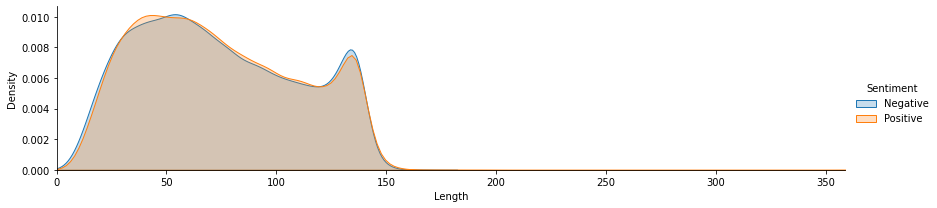

In [149]:
plt.figure(figsize = (10,6))
facetgridplot(df_v, 'Length')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


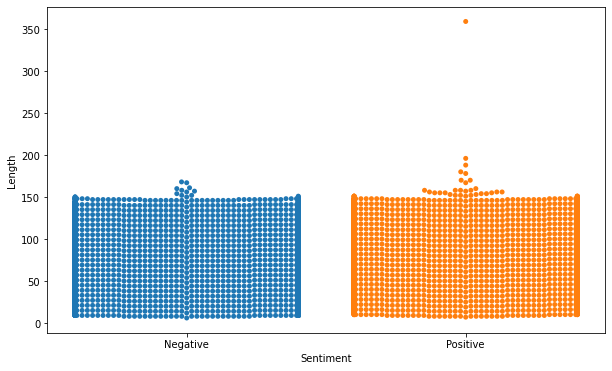

In [ ]:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'Sentiment', y = 'Length', data = df_v)

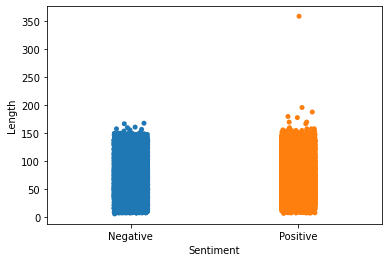

In [ ]:
sns.stripplot(x = 'Sentiment', y = 'Length', data = df_v)

In [ ]:
data_pos = df_v[df_v['Sentiment'] == 'Positive'].text.tolist()
data_pos[1]

' ok I hate the postman !'

In [ ]:
word_list_pos = ' '.join(data_pos).split()
word_list_pos[1]

'Get'

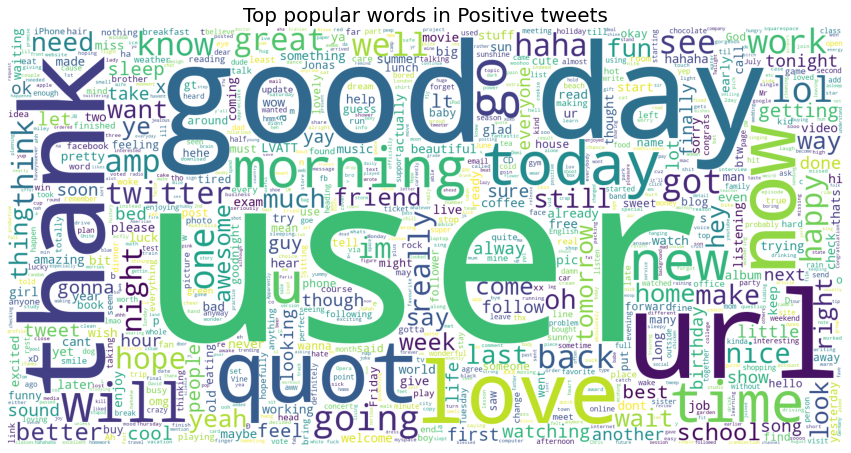

In [ ]:
#Positive Sentiment Tweet
wc = WordCloud(background_color = 'white',max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(word_list_pos))
fig = plt.figure(figsize = (15,15))
plt.axis('off')
plt.title('Top popular words in Positive tweets', fontsize=20)
#fig.suptitle('Top popular words in Positive tweets', fontsize=20)
fig.subplots_adjust(top=3)
plt.imshow(wc)
plt.show()

In [ ]:
data_neg= df_v[df_v['Sentiment'] == 'Negative'].text.tolist()
data_neg[1]

'my whole body feels itchy and like its on fire '

In [ ]:
word_list_neg = ' '.join(data_neg).split()
word_list_neg[1]

'url'

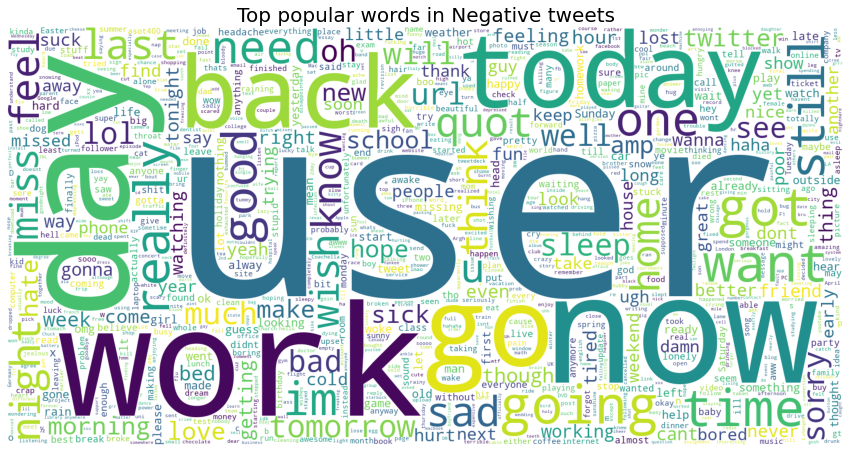

In [ ]:
#Negative Sentiment Tweet
wc = WordCloud(background_color = 'white',max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(word_list_neg))
fig = plt.figure(figsize = (15,15))
plt.axis('off')
plt.title('Top popular words in Negative tweets', fontsize=20)
#fig.suptitle('Top popular words in Negative tweets', fontsize=20)
fig.subplots_adjust(top=3)
plt.imshow(wc)
plt.show()

# Feature Engineering

##Count Vectors as features

In [ ]:
# Count Vectors as features

# create a count vectorizer object
count_vect = CountVectorizer(token_pattern = r'\w{1,}')

# Learn a vocabulary dictionary of all tokens in the raw documents
count_vect.fit(df['text'])

# Transform documents to document-term matrix.
X_train_count = count_vect.transform(X_train)
X_test_count = count_vect.transform(X_test)

In [ ]:
sample = ['This guitar is beautiful', 'I like this guitar']

In [ ]:
sample_count_vect = count_vect.transform(sample)

In [ ]:
print(sample_count_vect)

  (0, 3567)	1
  (0, 13736)	1
  (0, 16230)	1
  (0, 31217)	1
  (1, 13736)	1
  (1, 15393)	1
  (1, 18230)	1
  (1, 31217)	1


##TF-IDF Vectors as features

In [ ]:
#TF-IDF Vectors as features
# TF-IDF to allow the important but less often words to gain weights in the meaning.

In [ ]:
# Word_level tf-idf

tfidf_vect = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect)

tfidf_vect.fit(df['text'])
X_train_tfidf = tfidf_vect.transform(X_train)
X_test_tfidf  = tfidf_vect.transform(X_test)



TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')


In [ ]:
%%time
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 3),
                                   max_features = 5000)
print(tfidf_vect_ngram)

tfidf_vect_ngram.fit(df['text'])
X_train_tfidf_ngram = tfidf_vect_ngram.transform(X_train)
X_test_tfidf_ngram  = tfidf_vect_ngram.transform(X_test)

TfidfVectorizer(max_features=5000, ngram_range=(2, 3), token_pattern='\\w{1,}')
CPU times: user 5.5 s, sys: 89.1 ms, total: 5.58 s
Wall time: 5.56 s


In [ ]:
%%time
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer = 'char',
                                         token_pattern = r'\w{1,}',
                                         ngram_range = (2, 3),
                                         max_features = 5000)
print(tfidf_vect_ngram_chars)

tfidf_vect_ngram_chars.fit(df['text'])
X_train_tfidf_ngram_chars = tfidf_vect_ngram_chars.transform(X_train)
X_test_tfidf_ngram_chars  = tfidf_vect_ngram_chars.transform(X_test)

TfidfVectorizer(analyzer='char', max_features=5000, ngram_range=(2, 3),
                token_pattern='\\w{1,}')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  "The parameter 'token_pattern' will not be used"


CPU times: user 8.63 s, sys: 35 ms, total: 8.66 s
Wall time: 8.65 s


## Text/NLP based features

In [ ]:
# Text/NLP based features
#Create some other features.

#Char_Count = Number of Characters in Text

#Word Count = Number of Words in Text

#Word Density = Average Number of Char in Words

#Punctuation Count = Number of Punctuation in Text

#Title Word Count = Number of Words in Title

#Uppercase Word Count = Number of Upperwords in Text


In [ ]:
%%time
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['word_density'] = df['char_count'] / (df['word_count'] + 1)
df['punctuation_count'] = df['text'].apply(lambda x: len(''.join(_ for _ in x if _ in string.punctuation))) 
df['title_word_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.istitle()]))
df['uppercase_word_count'] = df['text'].apply(lambda x: len([w for w in x.split() if w.isupper()]))

CPU times: user 624 ms, sys: 2.01 ms, total: 626 ms
Wall time: 624 ms


In [ ]:
df.sample(5)

,target,tweet,text,char_count,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count
1593955,1,"@MewPaperArts Yes, where is the sun?! I blogge...","user Yes, where is the sun?! I blogged about t...",69,14,4.600000,3,2,1
1592065,1,@CT3GUITAR you don't have to do it!!! trust me!,user you don't have to do it!!! trust me!,42,9,4.200000,5,0,0
1584691,1,@Glompbot for some reason rhubarb put images o...,user for some reason rhubarb put images of PIE...,96,18,5.052632,1,1,1
1593407,1,a day with just the pups before 3 weeks with f...,a day with just the pups before 3 weeks with f...,57,12,4.384615,1,0,0
1580187,1,@mermhart Even thought where part of the commo...,user Even thought where part of the common wea...,105,20,5.000000,1,3,2


In [ ]:
df.shape

(50000, 9)

In [ ]:
df.shape[0]

50000

In [ ]:
# load spacy  # object-oriented
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Initialise some columns for feature's counts
df['adj_count'] = 0
df['adv_count'] = 0
df['noun_count'] = 0
df['num_count'] = 0
df['pron_count'] = 0
df['propn_count'] = 0
df['verb_count'] = 0

In [ ]:
len(range(df.shape[0]))

50000

In [ ]:
len(range(df.shape[1]))

16

In [ ]:
df.shape

(50000, 16)

In [ ]:
df.iloc[2]['text']

"user no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "

In [ ]:
nlp(df.iloc[2]['text'])

user no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 

In [ ]:
df['text']= df['text'].astype(str)

In [ ]:
%%time
# for each text
for i in range(df.shape[1]):
    # convert into a spaCy document
    doc = nlp(df.iloc[i]['text'])
    # initialise feature counters
    c = Counter([t.pos_ for t in doc])

    df.at[i, 'adj_count'] = c['ADJ']
    df.at[i, 'adv_count'] = c['ADV']
    df.at[i, 'noun_count'] = c['NOUN']
    df.at[i, 'num_count'] = c['NUM']
    df.at[i, 'pron_count'] = c['PRON']
    df.at[i, 'propn_count'] = c['PROPN']
    df.at[i, 'verb_count'] = c['VERB']

CPU times: user 149 ms, sys: 1 ms, total: 150 ms
Wall time: 149 ms


In [ ]:

df.at[2, 'adj_count']

1

In [ ]:
df.shape

(50000, 16)

In [ ]:
df.columns

Index(['target', 'tweet', 'text', 'char_count', 'word_count', 'word_density',
       'punctuation_count', 'title_word_count', 'uppercase_word_count',
       'adj_count', 'adv_count', 'noun_count', 'num_count', 'pron_count',
       'propn_count', 'verb_count'],
      dtype='object')

In [ ]:
pd.set_option('expand_frame_repr', False) 
df.head(1)

,target,tweet,text,char_count,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","user url - Awww, that's a bummer. You shoulda...",87,19,4.35,6,7,1,0,0,2,0,3,7,2


In [ ]:
df.tail()

,target,tweet,text,char_count,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
1200000,1,danielle is the best thing since cheese in a c...,danielle is the best thing since cheese in a c...,50,10,4.545455,1,0,0,0,0,0,0,0,0,0
1599988,1,@Roy_Everitt ha- good job. that's right - we g...,user ha- good job. that's right - we gotta thr...,117,22,5.086957,6,2,3,0,0,0,0,0,0,0
1599976,1,"@mattycus Yeah, my conscience would be clear i...","user Yeah, my conscience would be clear in tha...",54,10,4.909091,2,1,0,0,0,0,0,0,0,0
1599952,1,#Traveltuesday @GuyNGirlTravels Because their ...,#Traveltuesday user Because their tweets are h...,87,12,6.692308,2,2,1,0,0,0,0,0,0,0
1599999,1,happy #charitytuesday @theNSPCC @SparksCharity...,happy #charitytuesday user user user,37,5,6.166667,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(50000, 16)

In [ ]:
cols = [
    'char_count',
    'word_count',
    'word_density',
    'punctuation_count',
    'title_word_count',
    'uppercase_word_count',
    'adj_count',
    'adv_count',
    'noun_count',
    'num_count',
    'pron_count',
    'propn_count',
    'verb_count']

df[cols].sample(5)

,char_count,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
11047,70,12,5.384615,1,1,1,0,0,0,0,0,0,0
1203,37,7,4.625000,2,0,0,0,0,0,0,0,0,0
1579908,85,16,5.000000,4,3,1,0,0,0,0,0,0,0
1583568,100,20,4.761905,1,1,1,0,0,0,0,0,0,0
1591203,86,15,5.375000,5,3,1,0,0,0,0,0,0,0


In [ ]:
df.shape

(50000, 16)

In [ ]:
df.tail(5)

,target,tweet,text,char_count,word_count,word_density,punctuation_count,title_word_count,uppercase_word_count,adj_count,adv_count,noun_count,num_count,pron_count,propn_count,verb_count
1200000,1,danielle is the best thing since cheese in a c...,danielle is the best thing since cheese in a c...,50,10,4.545455,1,0,0,0,0,0,0,0,0,0
1599988,1,@Roy_Everitt ha- good job. that's right - we g...,user ha- good job. that's right - we gotta thr...,117,22,5.086957,6,2,3,0,0,0,0,0,0,0
1599976,1,"@mattycus Yeah, my conscience would be clear i...","user Yeah, my conscience would be clear in tha...",54,10,4.909091,2,1,0,0,0,0,0,0,0,0
1599952,1,#Traveltuesday @GuyNGirlTravels Because their ...,#Traveltuesday user Because their tweets are h...,87,12,6.692308,2,2,1,0,0,0,0,0,0,0
1599999,1,happy #charitytuesday @theNSPCC @SparksCharity...,happy #charitytuesday user user user,37,5,6.166667,1,0,0,0,0,0,0,0,0,0


In [ ]:
save_path = '/content/drive/My Drive/Capstone Project/text_based_features_3000.csv'

In [ ]:
df.to_csv(save_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 1599999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   target                50000 non-null  int64  
 1   tweet                 50000 non-null  object 
 2   text                  50000 non-null  object 
 3   char_count            50000 non-null  int64  
 4   word_count            50000 non-null  int64  
 5   word_density          50000 non-null  float64
 6   punctuation_count     50000 non-null  int64  
 7   title_word_count      50000 non-null  int64  
 8   uppercase_word_count  50000 non-null  int64  
 9   adj_count             50000 non-null  int64  
 10  adv_count             50000 non-null  int64  
 11  noun_count            50000 non-null  int64  
 12  num_count             50000 non-null  int64  
 13  pron_count            50000 non-null  int64  
 14  propn_count           50000 non-null  int64  
 15  verb_count       

In [ ]:
df.isnull().sum()

target                  0
tweet                   0
text                    0
char_count              0
word_count              0
word_density            0
punctuation_count       0
title_word_count        0
uppercase_word_count    0
adj_count               0
adv_count               0
noun_count              0
num_count               0
pron_count              0
propn_count             0
verb_count              0
dtype: int64

#Models

In [ ]:
## helper function

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)

    return accuracy_score(predictions, y_test)

In [ ]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors',
                                  'CharLevel Vectors'])

In [ ]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors


##Logistic Regression 

In [ ]:
%%time
# Linear Classifier on Count Vectors
accuracy_lr1 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 350), X_train_count, y_train, X_test_count)
print('LR, Count Vectors    : %.4f\n' % accuracy_lr1)

LR, Count Vectors    : 0.7820

CPU times: user 7.15 s, sys: 25.3 s, total: 32.5 s
Wall time: 4.12 s


In [ ]:
%%time
# Linear Classifier on Word Level TF IDF Vectors
accuracy_lr2 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf, y_train, X_test_tfidf)
print('LR, WordLevel TF-IDF : %.4f\n' % accuracy_lr2)

LR, WordLevel TF-IDF : 0.7886

CPU times: user 708 ms, sys: 638 ms, total: 1.35 s
Wall time: 636 ms


In [ ]:
%%time
# Linear Classifier on Ngram Level TF IDF Vectors
accuracy_lr3 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('LR, N-Gram Vectors   : %.4f\n' % accuracy_lr3)

LR, N-Gram Vectors   : 0.7203

CPU times: user 534 ms, sys: 4.86 ms, total: 539 ms
Wall time: 539 ms


In [ ]:
%%time
# Linear Classifier on Character Level TF IDF Vectors
accuracy_lr4 = train_model(LogisticRegression(solver = 'lbfgs', max_iter = 100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('LR, CharLevel Vectors: %.4f\n' % accuracy_lr4)

LR, CharLevel Vectors: 0.7723

CPU times: user 1.3 s, sys: 5 ms, total: 1.31 s
Wall time: 1.3 s


In [ ]:
results.loc['Logistic Regression'] = {
    'Count Vectors': accuracy_lr1,
    'WordLevel TF-IDF': accuracy_lr2,
    'N-Gram Vectors': accuracy_lr3,
    'CharLevel Vectors': accuracy_lr4}

## Naive Bayes 

In [ ]:
%%time
# Naive Bayes on Count Vectors
accuracy_nb1 = train_model(MultinomialNB(), X_train_count, y_train, X_test_count)
print('NB, Count Vectors    : %.4f\n' % accuracy_nb1)

NB, Count Vectors    : 0.7743

CPU times: user 18.6 ms, sys: 0 ns, total: 18.6 ms
Wall time: 17.8 ms


In [ ]:
%%time
# Naive Bayes on Word Level TF IDF Vectors
accuracy_nb2 = train_model(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf)
print('NB, WordLevel TF-IDF : %.4f\n' % accuracy_nb2)

NB, WordLevel TF-IDF : 0.7737

CPU times: user 17.3 ms, sys: 0 ns, total: 17.3 ms
Wall time: 15.7 ms


In [ ]:
%%time
# Naive Bayes on Ngram Level TF IDF Vectors
accuracy_nb3 = train_model(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('NB, N-Gram Vectors   : %.4f\n' % accuracy_nb3)

NB, N-Gram Vectors   : 0.7205

CPU times: user 14.7 ms, sys: 1.99 ms, total: 16.6 ms
Wall time: 15 ms


In [ ]:
%%time
# # Naive Bayes on Character Level TF IDF Vectors
accuracy_nb4 = train_model(MultinomialNB(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('NB, CharLevel Vectors: %.4f\n' % accuracy_nb4)

NB, CharLevel Vectors: 0.7416

CPU times: user 50.3 ms, sys: 0 ns, total: 50.3 ms
Wall time: 48.5 ms


In [ ]:
NB_tfidf_ngram_chars = MultinomialNB()
NB_tfidf_ngram_chars.fit(X_train_tfidf_ngram_chars, y_train)

MultinomialNB()

In [ ]:
results.loc['Naïve Bayes'] = {
    'Count Vectors': accuracy_nb1,
    'WordLevel TF-IDF': accuracy_nb2,
    'N-Gram Vectors': accuracy_nb3,
    'CharLevel Vectors': accuracy_nb4}

## Support Vector Machine

In [ ]:
%%time
# Support Vector Machine on Count Vectors
accuracy_svm1 = train_model(LinearSVC(), X_train_count, y_train, X_test_count)
print('SVM, Count Vectors    : %.4f\n' % accuracy_svm1)

SVM, Count Vectors    : 0.7614

CPU times: user 5.15 s, sys: 3.9 ms, total: 5.16 s
Wall time: 5.14 s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
%%time
# Support Vector Machine on Word Level TF IDF Vectors
accuracy_svm2 = train_model(LinearSVC(), X_train_tfidf, y_train, X_test_tfidf)
print('SVM, WordLevel TF-IDF : %.4f\n' % accuracy_svm2)

SVM, WordLevel TF-IDF : 0.7764

CPU times: user 306 ms, sys: 7 µs, total: 306 ms
Wall time: 303 ms


In [ ]:
%%time
# Support Vector Machine on Ngram Level TF IDF Vectors
accuracy_svm3 = train_model(LinearSVC(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('SVM, N-Gram Vectors   : %.4f\n' % accuracy_svm3)

SVM, N-Gram Vectors   : 0.7091

CPU times: user 226 ms, sys: 981 µs, total: 227 ms
Wall time: 226 ms


In [ ]:
%%time
# Support Vector Machine on Character Level TF IDF Vectors
accuracy_svm4 = train_model(LinearSVC(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('SVM, CharLevel Vectors: %.4f\n' % accuracy_svm4)

SVM, CharLevel Vectors: 0.7723

CPU times: user 1.57 s, sys: 1.97 ms, total: 1.58 s
Wall time: 1.57 s


In [ ]:
results.loc['Support Vector Machine'] = {
    'Count Vectors': accuracy_svm1,
    'WordLevel TF-IDF': accuracy_svm2,
    'N-Gram Vectors': accuracy_svm3,
    'CharLevel Vectors': accuracy_svm4}

## Random Forest

In [ ]:
%%time
# Bagging (Random Forest) on Count Vectors
accuracy_rf1 = train_model(RandomForestClassifier(n_estimators = 100), X_train_count, y_train, X_test_count)
print('RF, Count Vectors    : %.4f\n' % accuracy_rf1)

RF, Count Vectors    : 0.7680

CPU times: user 3min 4s, sys: 101 ms, total: 3min 4s
Wall time: 3min 4s


In [ ]:
%%time
# Bagging (Random Forest) on Word Level TF IDF Vectors
accuracy_rf2 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf, y_train, X_test_tfidf)
print('RF, WordLevel TF-IDF : %.4f\n' % accuracy_rf2)

RF, WordLevel TF-IDF : 0.7572

CPU times: user 1min 1s, sys: 59.3 ms, total: 1min 1s
Wall time: 1min


In [ ]:
%%time
# Bagging (Random Forest) on Ngram Level TF IDF Vectors
accuracy_rf3 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('RF, N-Gram Vectors   : %.4f\n' % accuracy_rf3)

RF, N-Gram Vectors   : 0.7005

CPU times: user 1min 25s, sys: 52.2 ms, total: 1min 25s
Wall time: 1min 25s


In [ ]:
%%time 
# characters level tf-idf
# Bagging (Random Forest) on Character Level TF IDF Vectors
accuracy_rf4 = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('RF, CharLevel Vectors: %.4f\n' % accuracy_rf4)

RF, CharLevel Vectors: 0.7444

CPU times: user 2min 41s, sys: 80.7 ms, total: 2min 41s
Wall time: 2min 41s


In [ ]:
rf_tfidf_ngram_chars = RandomForestClassifier(n_estimators = 100)
rf_tfidf_ngram_chars.fit(X_train_tfidf_ngram_chars, y_train)

RandomForestClassifier()

In [ ]:
results.loc['Random Forest'] = {
    'Count Vectors': accuracy_rf1,
    'WordLevel TF-IDF': accuracy_rf2,
    'N-Gram Vectors': accuracy_rf3,
    'CharLevel Vectors': accuracy_rf4}

## Gradient Boosting

In [ ]:
%%time
# Gradient Boosting on Count Vectors
accuracy_gb1 = train_model(GradientBoostingClassifier(), X_train_count, y_train, X_test_count)
print('GB, Count Vectors    : %.4f\n' % accuracy_gb1)

GB, Count Vectors    : 0.7050

CPU times: user 1min 33s, sys: 63.5 ms, total: 1min 33s
Wall time: 1min 33s


In [ ]:
%%time
# Gradient Boosting on Word Level TF IDF Vectors
accuracy_gb2 = train_model(GradientBoostingClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print('GB, WordLevel TF-IDF : %.4f\n' % accuracy_gb2)

GB, WordLevel TF-IDF : 0.7002

CPU times: user 17.8 s, sys: 51 ms, total: 17.9 s
Wall time: 17.8 s


In [ ]:
%%time
# Gradient Boosting on Ngram Level TF IDF Vectors
accuracy_gb3 = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print('GB, N-Gram Vectors   : %.4f\n' % accuracy_gb3)

GB, N-Gram Vectors   : 0.6322

CPU times: user 7.68 s, sys: 41.9 ms, total: 7.72 s
Wall time: 7.71 s


In [ ]:
%%time
# Gradient Boosting on Character Level TF IDF Vectors
accuracy_gb4 = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram_chars, y_train, X_test_tfidf_ngram_chars)
print('GB, CharLevel Vectors: %.4f\n' % accuracy_gb4)

GB, CharLevel Vectors: 0.7223

CPU times: user 2min 58s, sys: 150 ms, total: 2min 59s
Wall time: 2min 58s


In [ ]:
results.loc['Gradient Boosting'] = {
    'Count Vectors': accuracy_gb1,
    'WordLevel TF-IDF': accuracy_gb2,
    'N-Gram Vectors': accuracy_gb3,
    'CharLevel Vectors': accuracy_gb4}

In [ ]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors
Logistic Regression,0.7820,0.7886,0.7203,0.7723
Naïve Bayes,0.7743,0.7737,0.7205,0.7416
Support Vector Machine,0.7614,0.7764,0.7091,0.7723
Random Forest,0.7680,0.7572,0.7005,0.7444
Gradient Boosting,0.7050,0.7002,0.6322,0.7223


In [ ]:
results['average'] = results.iloc[:, 0:3].mean(axis=1)

In [ ]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors,CharLevel Vectors,average
Logistic Regression,0.7820,0.7886,0.7203,0.7723,0.763633
Naïve Bayes,0.7743,0.7737,0.7205,0.7416,0.756167
Support Vector Machine,0.7614,0.7764,0.7091,0.7723,0.748967
Random Forest,0.7680,0.7572,0.7005,0.7444,0.741900
Gradient Boosting,0.7050,0.7002,0.6322,0.7223,0.679133


# Apply Model

In [ ]:
test_text = ["Wish you all the best",
            "May the Luck be with you.",
            "I don't feel so good",
             "I love data science",
             "This event is not pleasant",
             "No one likes rainy day",
             "I'd really truly love going out in this weather!"
             ]

In [ ]:
pred_sample = pd.DataFrame(test_text, columns = ['test_text'])
pred_sample

,test_text
0,Wish you all the best
1,May the Luck be with you.
2,I don't feel so good
3,I love data science
4,This event is not pleasant
5,No one likes rainy day
6,I'd really truly love going out in this weather!


In [ ]:
pred_sample['check'] = pred_sample['test_text'].apply(change_username)

In [ ]:
pred_sample

,test_text,check
0,Wish you all the best,Wish you all the best
1,May the Luck be with you.,May the Luck be with you.
2,I don't feel so good,I don't feel so good
3,I love data science,I love data science
4,This event is not pleasant,This event is not pleasant
5,No one likes rainy day,No one likes rainy day
6,I'd really truly love going out in this weather!,I'd really truly love going out in this weather!


In [ ]:
#tdidf_check = tfidf_vect_ngram_chars.transform(pred_sample['check'] ) # randome forest
tdidf_check = tfidf_vect_ngram_chars.transform(pred_sample['check'] )
tdidf_check

<7x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 327 stored elements in Compressed Sparse Row format>

In [ ]:
#sentiment = rf_tfidf_ngram_chars.predict(tdidf_check)
#sentiment = rf_tfidf_ngram_chars.predict(tdidf_check)
sentiment =  NB_tfidf_ngram_chars.predict(tdidf_check)
sentiment

array([1, 1, 0, 1, 0, 0, 1])

In [ ]:
pred_sample['sentiment'] = sentiment .tolist()
pred_sample = pred_sample.replace([0,1], ["Negative","Positive"])
pred_sample

,test_text,check,sentiment
0,Wish you all the best,Wish you all the best,Positive
1,May the Luck be with you.,May the Luck be with you.,Positive
2,I don't feel so good,I don't feel so good,Negative
3,I love data science,I love data science,Positive
4,This event is not pleasant,This event is not pleasant,Negative
5,No one likes rainy day,No one likes rainy day,Negative
6,I'd really truly love going out in this weather!,I'd really truly love going out in this weather!,Positive
